# IIC-3641 GML UC

- Versiones de librerías, python 3.10.2

- networkx 2.6.2

https://pytorch-geometric.readthedocs.io/en/latest/install/installation.html

## Setup

In [1]:
from torch_geometric.nn import Node2Vec
import os.path as osp
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torch_geometric.datasets import Planetoid
from tqdm.notebook import tqdm

## Vamos a cargar el dataset Cora. Cora contiene 2708 publicaicones clasificadas en siete ejes temáticos. La red de co-cotación tiene 5429 enlaces.

In [2]:
dataset = 'Cora'
path = osp.join('.', 'data', dataset)
dataset = Planetoid(path, dataset)
data = dataset[0]

## Declaramos los hiperparámetros de Node2Vec de geometric

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Node2Vec(data.edge_index, embedding_dim=128, 
                 walk_length=20,                        # lenght of rw
                 context_size=10, walks_per_node=20,    
                 num_negative_samples=1,                # una negativa por cada positiva 
                 p=200, q=1,                            # bias parameters
                 sparse=True).to(device)

/home/marcelo/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


## Se usa un loader para armar batches

In [4]:
loader = model.loader(batch_size=128, shuffle=True, num_workers=4)

In [5]:
for idx, (pos_rw, neg_rw) in enumerate(loader):
    print(idx, pos_rw.shape, neg_rw.shape)

0 torch.Size([28160, 10]) torch.Size([28160, 10])
1 torch.Size([28160, 10]) torch.Size([28160, 10])
2 torch.Size([28160, 10]) torch.Size([28160, 10])
3 torch.Size([28160, 10]) torch.Size([28160, 10])
4 torch.Size([28160, 10]) torch.Size([28160, 10])
5 torch.Size([28160, 10]) torch.Size([28160, 10])
6 torch.Size([28160, 10]) torch.Size([28160, 10])
7 torch.Size([28160, 10]) torch.Size([28160, 10])
8 torch.Size([28160, 10]) torch.Size([28160, 10])
9 torch.Size([28160, 10]) torch.Size([28160, 10])
10 torch.Size([28160, 10]) torch.Size([28160, 10])
11 torch.Size([28160, 10]) torch.Size([28160, 10])
12 torch.Size([28160, 10]) torch.Size([28160, 10])
13 torch.Size([28160, 10]) torch.Size([28160, 10])
14 torch.Size([28160, 10]) torch.Size([28160, 10])
15 torch.Size([28160, 10]) torch.Size([28160, 10])
16 torch.Size([28160, 10]) torch.Size([28160, 10])
17 torch.Size([28160, 10]) torch.Size([28160, 10])
18 torch.Size([28160, 10]) torch.Size([28160, 10])
19 torch.Size([28160, 10]) torch.Size([28

In [6]:
idx, (pos_rw, neg_rw) = next(enumerate(loader))

In [7]:
idx

0

In [8]:
(pos_rw.shape, neg_rw.shape)

(torch.Size([28160, 10]), torch.Size([28160, 10]))

In [9]:
pos_rw

tensor([[ 244, 1358,  289,  ..., 1699,  484, 2046],
        [ 779, 1592,  779,  ..., 1013, 1846, 2357],
        [ 123,   26, 2455,  ...,  123, 2455,  123],
        ...,
        [2045, 1013, 1120,  ...,  324, 2194, 2195],
        [ 733, 1294,  352,  ..., 1334, 1701, 1857],
        [1677, 1908, 1474,  ..., 1984, 1178, 1529]])

In [10]:
neg_rw

tensor([[ 244, 2629, 1459,  ...,  122, 1639, 1539],
        [ 779,  347, 2132,  ..., 2162, 2097, 2188],
        [ 123,  745,  562,  ..., 2304, 1790,   99],
        ...,
        [1141, 1034, 1263,  ..., 2511,  464, 1932],
        [2056,  480, 2293,  ..., 1928,   14, 1772],
        [1072,  612, 2293,  ...,   29, 1148, 1866]])

## Vamos a leer la red CORA en networkx

In [11]:
import networkx as nx 

edge_tuples = [tuple(x) for x in data.edge_index.numpy().transpose()]
G = nx.from_edgelist(edge_tuples)
pos = nx.spring_layout(G, center=[0.5, 0.5])
nx.set_node_attributes(G, pos, 'pos')

## Calculamos algunas características de la red

In [12]:
# Información básica del grafo
num_nodos = G.number_of_nodes()  # Número de nodos
num_aristas = G.number_of_edges()  # Número de aristas
grados_nodos = dict(G.degree())  # Grado de cada nodo
denso = nx.density(G)  # Densidad del grafo
componentes_conectados = nx.number_connected_components(G)  # Número de componentes conectados

# Información sobre la estructura del grafo
es_conexo = nx.is_connected(G)  # Verificar si el grafo es conexo
diámetro = nx.diameter(G) if es_conexo else 'N/A'  # Diámetro del grafo si es conexo
longitud_media_caminos = nx.average_shortest_path_length(G) if es_conexo else 'N/A'  # Longitud media de los caminos más cortos si es conexo
coef_clustering = nx.average_clustering(G)  # Coeficiente de agrupamiento promedio

# Mostrar la información
print(f"Número de nodos: {num_nodos}")
print(f"Número de aristas: {num_aristas}")
print(f"Componentes conectados: {componentes_conectados}")
print(f"Es conexo: {es_conexo}")
print(f"Diámetro del grafo: {diámetro}")
print(f"Longitud media de los caminos más cortos: {longitud_media_caminos}")
print(f"Coeficiente de agrupamiento promedio: {coef_clustering:.4f}")


Número de nodos: 2708
Número de aristas: 5278
Componentes conectados: 78
Es conexo: False
Diámetro del grafo: N/A
Longitud media de los caminos más cortos: N/A
Coeficiente de agrupamiento promedio: 0.2407


## Y la visualizamos

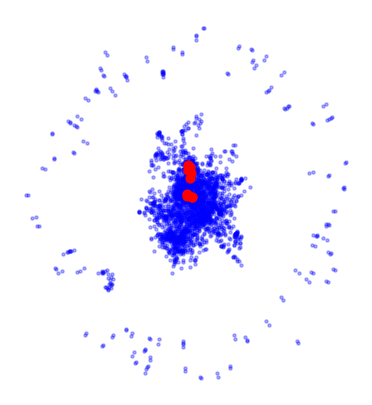

In [13]:
nodelist = next(enumerate(loader))[1][0][0].tolist()
walk = nx.path_graph(len(nodelist))
nx.set_node_attributes(walk, {idx: pos[node_id] for idx, node_id in enumerate(nodelist)}, 'pos')

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
nx.draw_networkx_nodes(G, 
                       ax=ax,
                       pos=nx.get_node_attributes(G, 'pos'), 
                       node_size=5,
                       alpha=0.3,
                       node_color='b')
nx.draw(walk, 
        node_size=40,
        node_color='r',
        ax=ax,
        pos=nx.get_node_attributes(walk, 'pos'), 
        width=2,
        edge_color='r') 
#ax = fig.add_subplot(1, 2, 2)
#nx.draw(walk, node_size=40, node_color='r', ax=ax, pos=nx.get_node_attributes(walk, 'pos'), width=2, edge_color='r') 

## Declaremos el optimizador que usaremos para entrenar Node2Vec

In [14]:
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

In [15]:
@torch.no_grad()
def test():
    model.eval()
    z = model()
    acc = model.test(z[data.train_mask], data.y[data.train_mask],
                     z[data.test_mask], data.y[data.test_mask],
                     max_iter=150)
    return acc

In [16]:
def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in tqdm(loader):
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

## Y entrenamos

In [17]:
for epoch in range(1, 201):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')
    

  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 01, Loss: 7.9713, Acc: 0.1470


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 02, Loss: 5.7897, Acc: 0.1710


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 03, Loss: 4.6023, Acc: 0.2020


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 04, Loss: 3.7330, Acc: 0.2470


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 05, Loss: 3.0630, Acc: 0.3070


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 06, Loss: 2.5626, Acc: 0.3440


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 07, Loss: 2.1752, Acc: 0.3880


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 08, Loss: 1.8743, Acc: 0.4170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 09, Loss: 1.6463, Acc: 0.4510


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 10, Loss: 1.4724, Acc: 0.4780


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 11, Loss: 1.3339, Acc: 0.5060


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 12, Loss: 1.2345, Acc: 0.5360


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 13, Loss: 1.1540, Acc: 0.5630


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 14, Loss: 1.0927, Acc: 0.5920


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 15, Loss: 1.0483, Acc: 0.6100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 16, Loss: 1.0116, Acc: 0.6250


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 17, Loss: 0.9827, Acc: 0.6280


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 18, Loss: 0.9591, Acc: 0.6450


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 19, Loss: 0.9416, Acc: 0.6560


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 20, Loss: 0.9262, Acc: 0.6620


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 21, Loss: 0.9139, Acc: 0.6720


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 22, Loss: 0.9025, Acc: 0.6820


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 23, Loss: 0.8953, Acc: 0.6800


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 24, Loss: 0.8871, Acc: 0.6850


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 25, Loss: 0.8801, Acc: 0.6820


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 26, Loss: 0.8750, Acc: 0.6920


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 27, Loss: 0.8704, Acc: 0.6900


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 28, Loss: 0.8655, Acc: 0.6960


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 29, Loss: 0.8616, Acc: 0.6910


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 30, Loss: 0.8587, Acc: 0.6930


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 31, Loss: 0.8553, Acc: 0.6880


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 32, Loss: 0.8540, Acc: 0.6980


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 33, Loss: 0.8514, Acc: 0.7060


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 34, Loss: 0.8491, Acc: 0.7070


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 35, Loss: 0.8469, Acc: 0.7030


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 36, Loss: 0.8452, Acc: 0.7010


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 37, Loss: 0.8436, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 38, Loss: 0.8421, Acc: 0.6940


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 39, Loss: 0.8409, Acc: 0.7020


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 40, Loss: 0.8401, Acc: 0.6960


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 41, Loss: 0.8380, Acc: 0.7050


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 42, Loss: 0.8373, Acc: 0.7050


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 43, Loss: 0.8364, Acc: 0.6930


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 44, Loss: 0.8366, Acc: 0.7000


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 45, Loss: 0.8349, Acc: 0.7130


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 46, Loss: 0.8332, Acc: 0.7130


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 47, Loss: 0.8327, Acc: 0.7090


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 48, Loss: 0.8322, Acc: 0.7140


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 49, Loss: 0.8308, Acc: 0.7240


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 50, Loss: 0.8308, Acc: 0.7280


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 51, Loss: 0.8308, Acc: 0.7270


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 52, Loss: 0.8304, Acc: 0.7160


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 53, Loss: 0.8302, Acc: 0.7220


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 54, Loss: 0.8288, Acc: 0.7220


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 55, Loss: 0.8283, Acc: 0.7150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 56, Loss: 0.8287, Acc: 0.7150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 57, Loss: 0.8288, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 58, Loss: 0.8284, Acc: 0.7230


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 59, Loss: 0.8282, Acc: 0.7220


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 60, Loss: 0.8275, Acc: 0.7150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 61, Loss: 0.8275, Acc: 0.7160


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 62, Loss: 0.8270, Acc: 0.7100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 63, Loss: 0.8272, Acc: 0.7140


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 64, Loss: 0.8267, Acc: 0.7180


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 65, Loss: 0.8262, Acc: 0.7220


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 66, Loss: 0.8266, Acc: 0.7140


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 67, Loss: 0.8258, Acc: 0.7100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 68, Loss: 0.8262, Acc: 0.7070


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 69, Loss: 0.8263, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 70, Loss: 0.8254, Acc: 0.7260


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 71, Loss: 0.8255, Acc: 0.7250


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 72, Loss: 0.8255, Acc: 0.7280


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 73, Loss: 0.8258, Acc: 0.7240


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 74, Loss: 0.8242, Acc: 0.7330


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 75, Loss: 0.8254, Acc: 0.7210


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 76, Loss: 0.8244, Acc: 0.7290


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 77, Loss: 0.8255, Acc: 0.7330


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 78, Loss: 0.8254, Acc: 0.7370


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 79, Loss: 0.8241, Acc: 0.7300


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 80, Loss: 0.8245, Acc: 0.7290


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 81, Loss: 0.8232, Acc: 0.7270


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 82, Loss: 0.8235, Acc: 0.7300


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 83, Loss: 0.8226, Acc: 0.7230


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 84, Loss: 0.8232, Acc: 0.7280


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 85, Loss: 0.8236, Acc: 0.7240


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 86, Loss: 0.8255, Acc: 0.7270


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 87, Loss: 0.8236, Acc: 0.7140


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 88, Loss: 0.8237, Acc: 0.7100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 89, Loss: 0.8235, Acc: 0.7130


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 90, Loss: 0.8240, Acc: 0.7230


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 91, Loss: 0.8227, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 92, Loss: 0.8238, Acc: 0.7230


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 93, Loss: 0.8229, Acc: 0.7320


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 94, Loss: 0.8224, Acc: 0.7210


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 95, Loss: 0.8232, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 96, Loss: 0.8227, Acc: 0.7090


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 97, Loss: 0.8236, Acc: 0.7160


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 98, Loss: 0.8230, Acc: 0.7140


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 99, Loss: 0.8230, Acc: 0.7100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 100, Loss: 0.8230, Acc: 0.7050


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 101, Loss: 0.8233, Acc: 0.7060


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 102, Loss: 0.8230, Acc: 0.7090


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 103, Loss: 0.8227, Acc: 0.7130


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 104, Loss: 0.8227, Acc: 0.7150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 105, Loss: 0.8234, Acc: 0.7190


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 106, Loss: 0.8223, Acc: 0.7090


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 107, Loss: 0.8229, Acc: 0.7100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 108, Loss: 0.8219, Acc: 0.7110


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 109, Loss: 0.8228, Acc: 0.7200


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 110, Loss: 0.8228, Acc: 0.7120


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 111, Loss: 0.8229, Acc: 0.7180


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 112, Loss: 0.8224, Acc: 0.7160


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 113, Loss: 0.8222, Acc: 0.7190


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 114, Loss: 0.8232, Acc: 0.7220


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 115, Loss: 0.8234, Acc: 0.7200


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 116, Loss: 0.8224, Acc: 0.7230


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 117, Loss: 0.8230, Acc: 0.7310


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 118, Loss: 0.8219, Acc: 0.7200


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 119, Loss: 0.8218, Acc: 0.7150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 120, Loss: 0.8222, Acc: 0.7190


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 121, Loss: 0.8220, Acc: 0.7140


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 122, Loss: 0.8220, Acc: 0.7160


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 123, Loss: 0.8230, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 124, Loss: 0.8220, Acc: 0.7220


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 125, Loss: 0.8214, Acc: 0.7240


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 126, Loss: 0.8227, Acc: 0.7250


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 127, Loss: 0.8222, Acc: 0.7120


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 128, Loss: 0.8228, Acc: 0.7120


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 129, Loss: 0.8227, Acc: 0.7230


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 130, Loss: 0.8235, Acc: 0.7210


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 131, Loss: 0.8231, Acc: 0.7250


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 132, Loss: 0.8227, Acc: 0.7350


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 133, Loss: 0.8218, Acc: 0.7250


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 134, Loss: 0.8213, Acc: 0.7150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 135, Loss: 0.8218, Acc: 0.7100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 136, Loss: 0.8226, Acc: 0.7160


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 137, Loss: 0.8230, Acc: 0.7110


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 138, Loss: 0.8232, Acc: 0.7270


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 139, Loss: 0.8213, Acc: 0.7190


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 140, Loss: 0.8228, Acc: 0.7320


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 141, Loss: 0.8224, Acc: 0.7260


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 142, Loss: 0.8225, Acc: 0.7210


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 143, Loss: 0.8224, Acc: 0.7240


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 144, Loss: 0.8227, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 145, Loss: 0.8226, Acc: 0.7200


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 146, Loss: 0.8228, Acc: 0.7140


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 147, Loss: 0.8227, Acc: 0.7110


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 148, Loss: 0.8219, Acc: 0.7210


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 149, Loss: 0.8222, Acc: 0.7220


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 150, Loss: 0.8225, Acc: 0.7200


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 151, Loss: 0.8215, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 152, Loss: 0.8229, Acc: 0.7070


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 153, Loss: 0.8218, Acc: 0.7090


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 154, Loss: 0.8228, Acc: 0.7120


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 155, Loss: 0.8208, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 156, Loss: 0.8221, Acc: 0.7070


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 157, Loss: 0.8214, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 158, Loss: 0.8223, Acc: 0.7160


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 159, Loss: 0.8214, Acc: 0.7220


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 160, Loss: 0.8229, Acc: 0.7130


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 161, Loss: 0.8227, Acc: 0.7210


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 162, Loss: 0.8221, Acc: 0.7310


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 163, Loss: 0.8228, Acc: 0.7290


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 164, Loss: 0.8228, Acc: 0.7270


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 165, Loss: 0.8215, Acc: 0.7210


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 166, Loss: 0.8222, Acc: 0.7190


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 167, Loss: 0.8217, Acc: 0.7290


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 168, Loss: 0.8222, Acc: 0.7310


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 169, Loss: 0.8221, Acc: 0.7250


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 170, Loss: 0.8220, Acc: 0.7210


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 171, Loss: 0.8227, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 172, Loss: 0.8222, Acc: 0.7150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 173, Loss: 0.8221, Acc: 0.7120


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 174, Loss: 0.8229, Acc: 0.7100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 175, Loss: 0.8212, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 176, Loss: 0.8214, Acc: 0.7100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 177, Loss: 0.8230, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 178, Loss: 0.8225, Acc: 0.7190


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 179, Loss: 0.8228, Acc: 0.7210


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 180, Loss: 0.8219, Acc: 0.7010


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 181, Loss: 0.8225, Acc: 0.7120


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 182, Loss: 0.8218, Acc: 0.7130


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 183, Loss: 0.8225, Acc: 0.7230


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 184, Loss: 0.8217, Acc: 0.7140


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 185, Loss: 0.8227, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 186, Loss: 0.8226, Acc: 0.7140


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 187, Loss: 0.8218, Acc: 0.7070


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 188, Loss: 0.8214, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 189, Loss: 0.8224, Acc: 0.7210


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 190, Loss: 0.8237, Acc: 0.7290


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 191, Loss: 0.8225, Acc: 0.7210


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 192, Loss: 0.8223, Acc: 0.7180


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 193, Loss: 0.8224, Acc: 0.7120


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 194, Loss: 0.8222, Acc: 0.7150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 195, Loss: 0.8223, Acc: 0.7110


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 196, Loss: 0.8217, Acc: 0.7110


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 197, Loss: 0.8223, Acc: 0.7040


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 198, Loss: 0.8226, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 199, Loss: 0.8232, Acc: 0.7040


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 200, Loss: 0.8223, Acc: 0.7020


## Vamos a usar los embeddings para calcular un t-SNE y visualizar el espacio latente

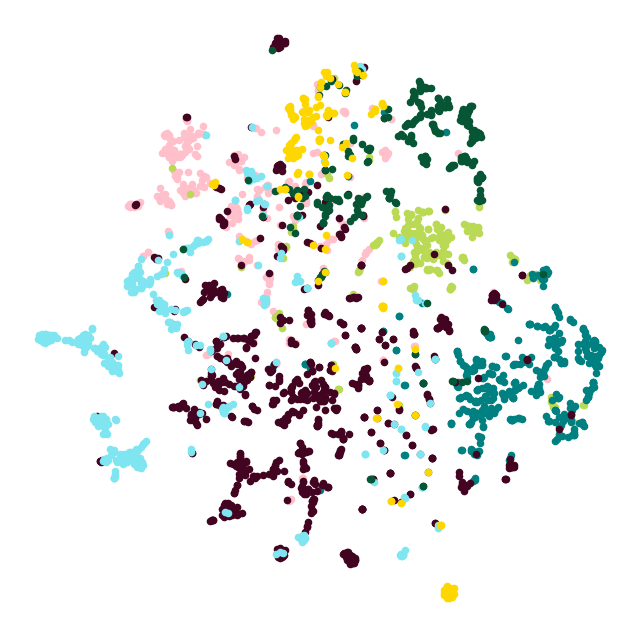

In [18]:
@torch.no_grad()
def plot_points(colors):
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    z = TSNE(n_components=2).fit_transform(z.cpu().numpy())
    y = data.y.cpu().numpy()

    plt.figure(figsize=(8, 8))
    for i in range(dataset.num_classes):
        plt.scatter(z[y == i, 0], z[y == i, 1], s=20, color=colors[i])
    plt.axis('off')
    plt.show()

colors = [
    '#ffc0cb', '#bada55', '#008080', '#420420', '#7fe5f0', '#065535',
    '#ffd700'
]
plot_points(colors)

## Ahora vamos a usar los embeddings para entrenar un clasificador

In [19]:
@torch.no_grad()
def return_model():
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    X = z.cpu().numpy()
    return X

X = return_model()
y = data.y.numpy()

In [20]:
print(X.shape)
print(y.shape)

(2708, 128)
(2708,)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Train a classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8339


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       101
           1       0.78      0.77      0.78        65
           2       0.94      0.93      0.93       121
           3       0.85      0.85      0.85       275
           4       0.83      0.84      0.83       123
           5       0.82      0.78      0.79        80
           6       0.76      0.79      0.78        48

    accuracy                           0.83       813
   macro avg       0.82      0.82      0.82       813
weighted avg       0.83      0.83      0.83       813



In [24]:
import itertools, matplotlib.pyplot as plt, numpy as np

class_names= ['Case_Based', 'Genetic_Algorithms', 'Neural_Networks', 'Probabilistic_Methods', 'Reinforcement_Learning', 'Rule_Learning', 'Theory']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


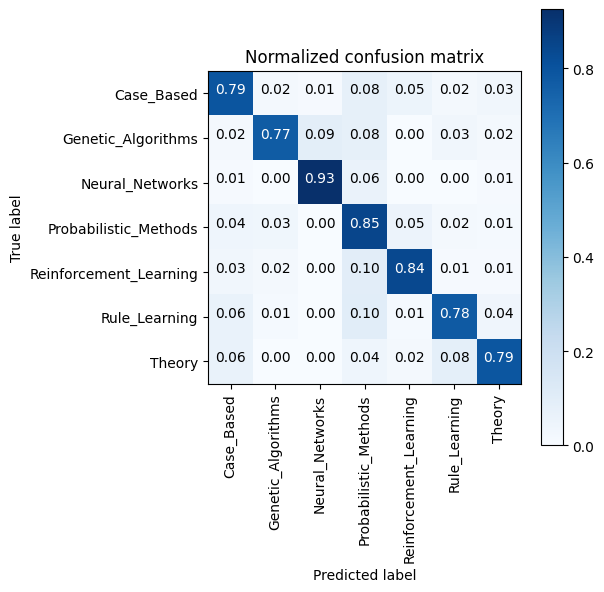

In [25]:
classes = list(map(str, list(np.unique(y_test))))

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

plt.show()